In [64]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn

In [39]:
%load_ext watermark
%watermark -v -p numpy,pandas,matplotlib,torch

Python implementation: CPython
Python version       : 3.9.16
IPython version      : 8.5.0

numpy     : 1.23.4
pandas    : 1.5.0
matplotlib: 3.6.1
torch     : 1.12.1+cu116



In [42]:
df = pd.read_csv("perceptron_toydata-truncated.txt", sep="\t")
df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [54]:
# define training data
X_train = df[['x1', 'x2']].values
y_train = df['label'].values
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [55]:
# turn data to tensors
X_train = torch.from_numpy(X_train).type(torch.float)
y_train = torch.from_numpy(y_train).type(torch.float)

In [59]:
# check how many samples we have of each class
np.bincount(y_train)

array([10, 10])

## Visualizing the data

Text(0, 0.5, 'Feature $x_2$')

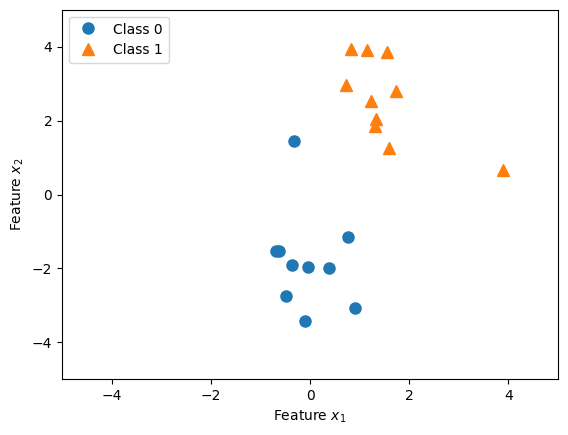

In [63]:
# this is so matplotlib doesn't throw errors when plotting
%matplotlib inline

from cProfile import label


plt.plot(X_train[y_train==0, 0],
         X_train[y_train==0, 1],
         marker = "o",
         markersize = 8,
         linestyle = "",
         label = "Class 0"
         )

plt.plot(X_train[y_train==1, 0],
         X_train[y_train==1, 1],
         marker = "^",
         markersize = 8,
         linestyle = "",
         label = "Class 1"
         )

plt.legend(loc = 2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$")
plt.ylabel("Feature $x_2$")

In [67]:
# build model class
class perceptron(nn.Module):
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(num_features)
        self.bias = torch.tensor(0.)

    # make forward pass
    def forward(self, x):
        weighted_sum_z = torch.dot(x, self.weights) + self.bias
        prediction = torch.where(weighted_sum_z > 0., 1., 0.)
        return prediction
    
    # update weights and bias
    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        # update
        self.weights += error * x
        self.bias += error

        return error


In [85]:
# initialize model
model = perceptron(num_features = 2)

In [82]:
# print model parameters
print("Model parameters:")
print("Weights: %s" % model.weights)
print("Bias: %s" % model.bias)

Model parameters:
Weights: tensor([0., 0.])
Bias: tensor(0.)


In [83]:
# create train function
def train(model, X_train, y_train, epochs):
    for epoch in range(epochs):
        error_count = 0

        for x, y in zip(X_train, y_train):
            error = model.update(x, y)
            error_count += abs(error)

        print(f"Epoch: {epoch + 1}, error: {error_count}")

In [86]:
# train model
train(model = model, X_train = X_train, y_train = y_train, epochs = 5)

Epoch: 1, error: 1.0
Epoch: 2, error: 3.0
Epoch: 3, error: 1.0
Epoch: 4, error: 0.0
Epoch: 5, error: 0.0


### Evaluate the results

In [87]:
# create accuracy function
def compute_accuracy(model, X_train, y_train):
    correct = 0
    for x, y in zip(X_train, y_train):
        prediction = model.forward(x)
        correct += int(prediction == y)

    return correct / len(y_train)

In [90]:
# compute accuracy
train_accuracy = compute_accuracy(model = model, X_train = X_train, y_train = y_train)

print(f"Accuracy on training data: {train_accuracy * 100}%")

Accuracy on training data: 100.0%


### Visualize the decision boundary

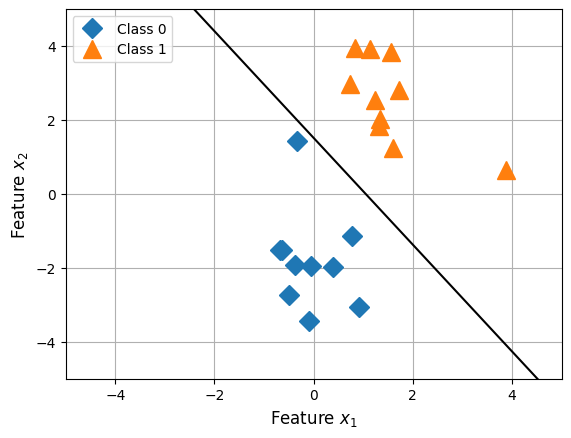

In [101]:
# plot decision boundary
def plot_boundary(model):

    w1, w2 = model.weights[0], model.weights[1]
    b = model.bias

    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / w2

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / w2

    return x1_min, x1_max, x2_min, x2_max



x1_min, x1_max, x2_min, x2_max = plot_boundary(model = model)


plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()
